In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [15]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count =data_df["Mouse ID"].value_counts()
number_of_mice=len(mice_count)
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

m_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
m_mean


m_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
m_median


m_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
m_variance


m_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
m_std

m_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
m_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame({"Mean": m_mean, "Median":m_median, "Variance":m_variance, "Standard Deviation": m_std, "SEM": m_sem})

print(summary_table)

summary_table.to_csv("fileOne.csv", index=False, header=True)
# Using the aggregation method, produce the same summary statistics in a single line


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

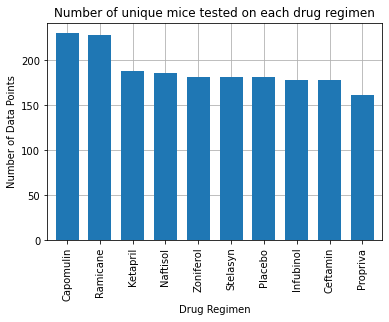

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_plot = data_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of unique mice tested on each drug regimen")


bar_plot.grid(zorder=0)

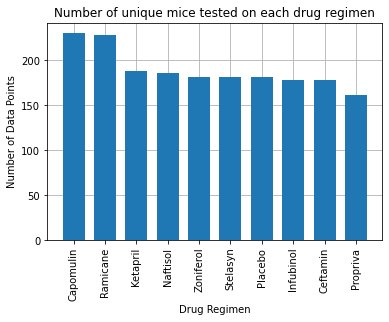

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Calculate the amount of data points for each regimen
counts = data_df['Drug Regimen'].value_counts()

# Set the x_axis
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks 
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, counts.index.values)

# Rotate tick marks 90 degrees 
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of unique mice tested on each drug regimen')

plt.grid(zorder=0)

# Display resulting plot
plt.show()



Text(0, 0.5, '')

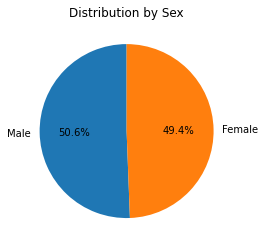

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data = data_df['Sex'].value_counts()

pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')


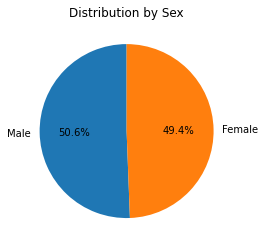

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = data_df['Sex'].value_counts()
#tell the program to use the percentages to create piechart
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_df = data_df.loc[data_df["Drug Regimen"] == "Ramicane", :]
Capomulin_df = data_df.loc[data_df["Drug Regimen"] == "Capomulin",:]
Ceftamin_df = data_df.loc[data_df["Drug Regimen"] == "Ceftamin", :]
Infubinol_df = data_df.loc[data_df["Drug Regimen"] == "Infubinol", :]

# Capomulin
Capomulin_l = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_l)
Capomulin_merge = pd.merge(Capomulin_vol, data_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [21]:
ramlast = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, data_df, on=("Mouse ID","Timepoint"),how="left")
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [22]:
inflast = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, data_df, on=("Mouse ID","Timepoint"),how="left")
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [23]:
ceftlast = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, data_df, on=("Mouse ID","Timepoint"),how="left")
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

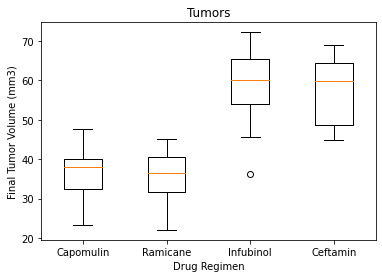

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

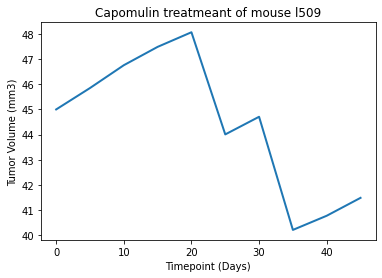

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis_timepoint = line_df["Timepoint"]
tumsize = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_timepoint, tumsize,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

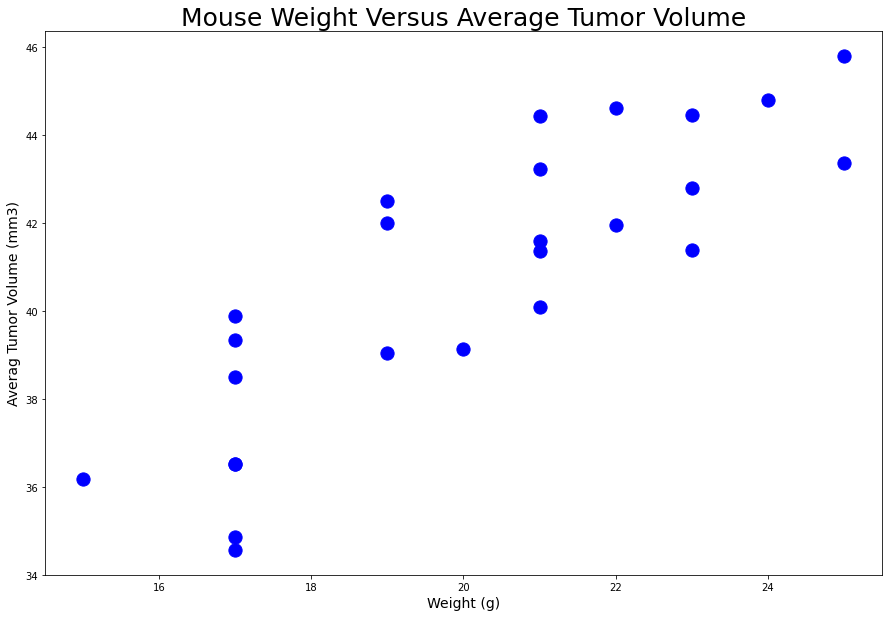

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [29]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


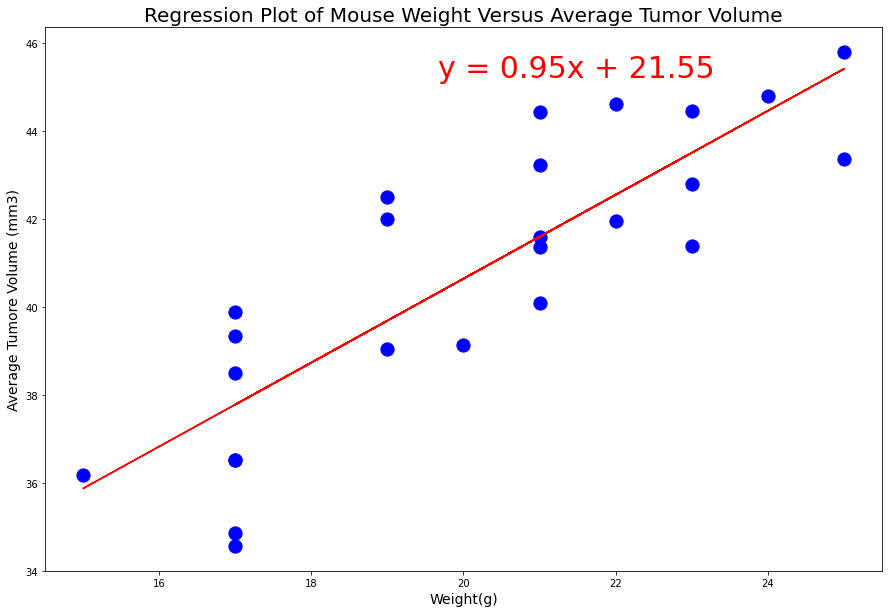

In [30]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()